# Probably Interesting Data
In order to understand our datasets and pick the best fitting algorithms, we must determine the estimated density. In this notebook, I use two different datasets as well as kmeans and expectation maximization to better derive possibilities. 

#### Data Sets
[Source](https://www.kaggle.com/uciml/datasets)

1. Prima Indians Diabetes
  * Includes nine columns of possible features. Most are continuous but a few discrete variables exist.
2. Iris
  * This dataset contains all continuous features. Clusters are well separated and easy to define.

In [1]:
import pandas as pd #for easy data analysis and plotting
import numpy as np
from sklearn import preprocessing as pr #for normalizing

import sys #import kmeans
sys.path.insert(0, '../libraries')
from kmeans import *

## Diabetes Dataset

In [2]:
#Import dataset
diabetes=pd.read_csv('../data/external/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Due to all of the differing scales and the statistics between k-means, must normalize the interesting data
#Source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
diabetescol=list(diabetes)
data=diabetes.values
min_max_scaler = pr.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
diabetes = pd.DataFrame(columns=diabetescol,data=x_scaled)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [4]:
#Implement quick histogram to better understand balances
diabetes.hist(bins=10)
diabetes.hist(bins=20)
diabetes.hist(bins=40)
diabetes.plot.hist(stacked=True,bins=20)

## Quick Analysis
In these binnings, we can see two possible clusters. One to the left such as age, diabetes pedigree function, insuin and skin thickness. Furthermore, there is another cluster located between frequency 0.4 and 0.8.

With these possible clusters, I programmed kmean algorithm and chose k=2

C:\Users\kjadmin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kjadmin\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


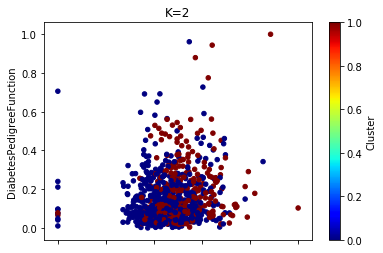

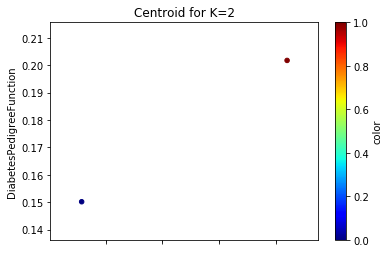

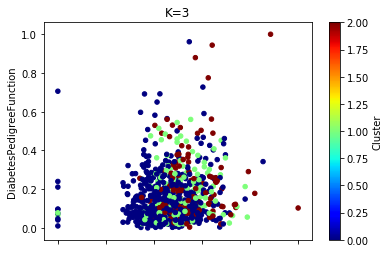

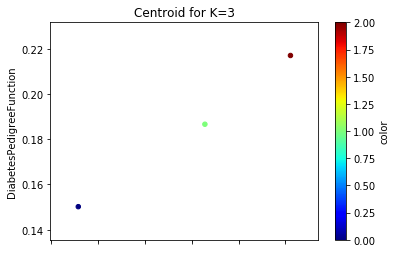

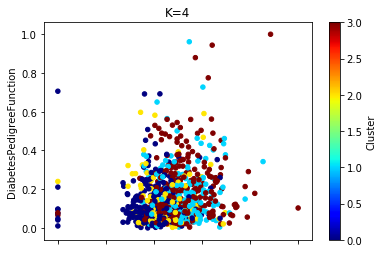

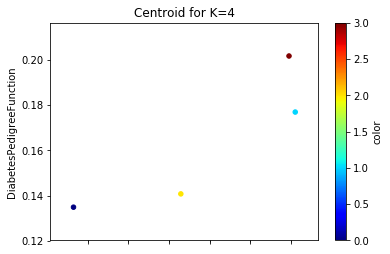

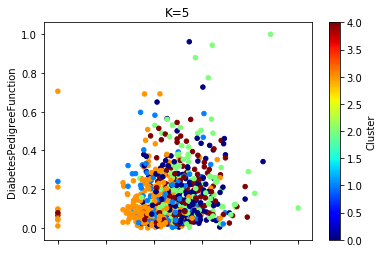

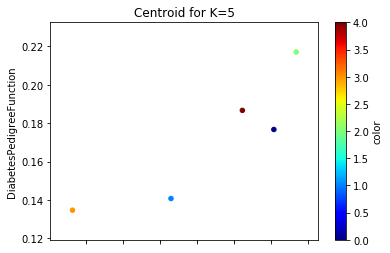

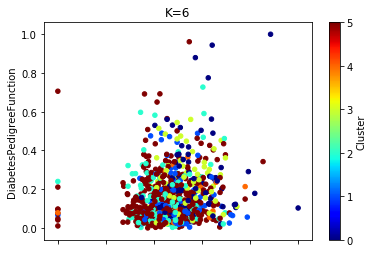

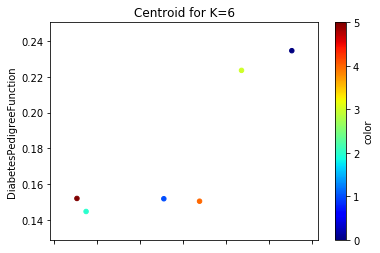

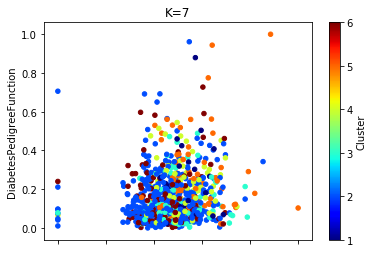

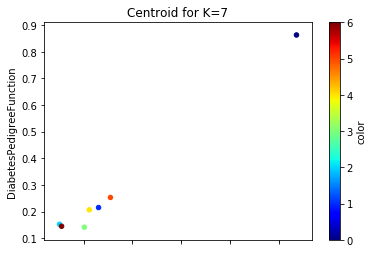

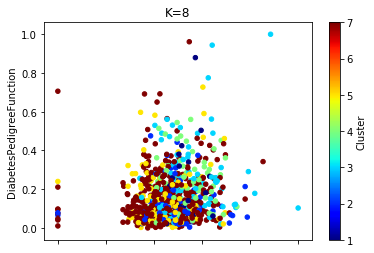

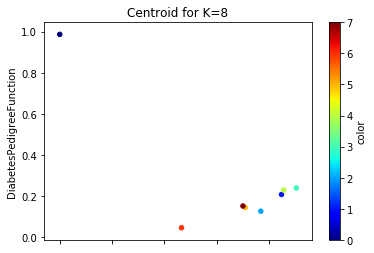

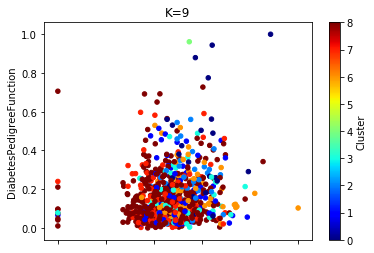

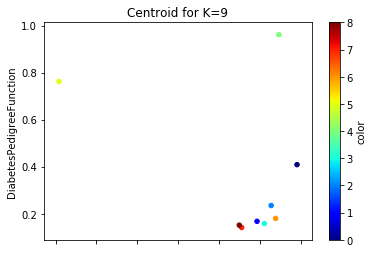

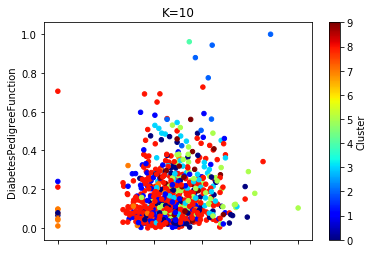

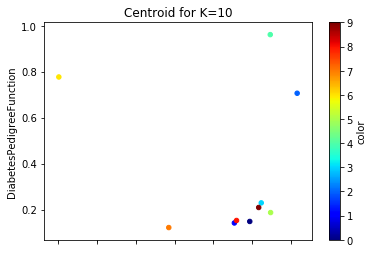

In [5]:
#Convert to numpy
checknum=diabetes.values

#Loop through values k=2 to k=10
for k in range(2,11,1):
    sometup=kmean(checknum, k)

    newcol=['Cluster'] + diabetescol
    newdatasets = pd.DataFrame(columns=newcol,data=sometup[0])
    newdatasets.plot.scatter(x='BMI', y='DiabetesPedigreeFunction', c='Cluster', colormap='jet',title="K="+str(k))
    
    #Plotting centroids for each k
    cents = pd.DataFrame(columns=diabetescol,data=sometup[1])
    colors=[]
    for i in range(0, k, 1):
        colors.append(i)
    cents['color']=colors
    cents.plot.scatter(x='BMI', y='DiabetesPedigreeFunction', c='color', colormap='jet', title="Centroid for K="+str(k))

## Iris Dataset

In [6]:
#Import dataset
iris=pd.read_csv('../data/external/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
#Due to all of the differing scales and the statistics between k-means, must normalize the interesting data
#Source: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
iris=iris.drop(columns={'Id','Species'})
iriscol=list(iris)
data=iris.values
min_max_scaler = pr.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data)
iris = pd.DataFrame(columns=iriscol,data=x_scaled)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


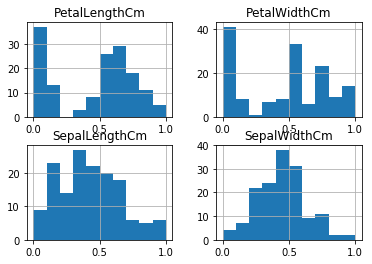

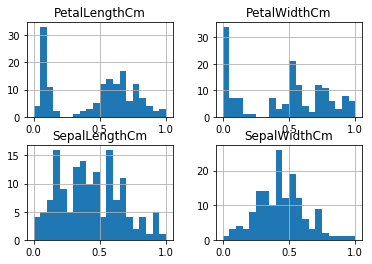

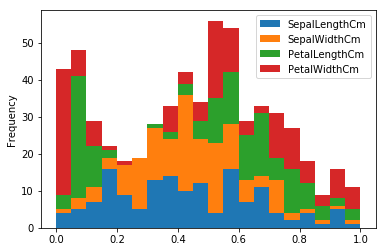

In [8]:
#Implement quick histogram to better understand limit balance
iris.hist(bins=10)
iris.hist(bins=20)
#focus=diabetes.loc[:,['BMI', 'DiabetesPedigreeFunction','Glucose','BloodPressure']]
iris.plot.hist(stacked=True,bins=20)

C:\Users\kjadmin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\kjadmin\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


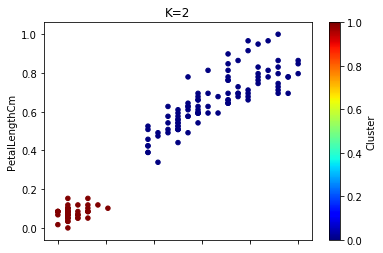

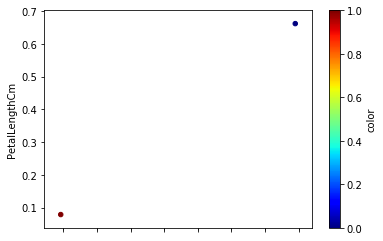

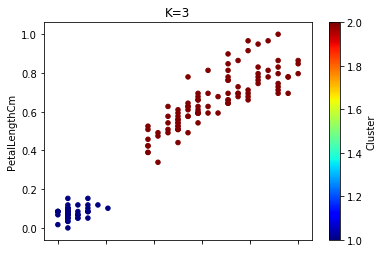

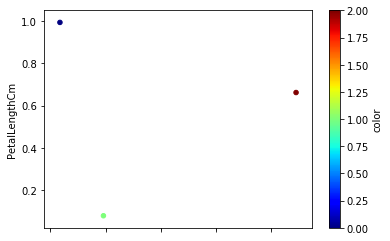

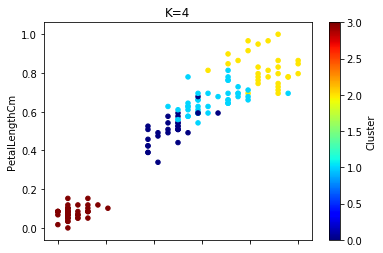

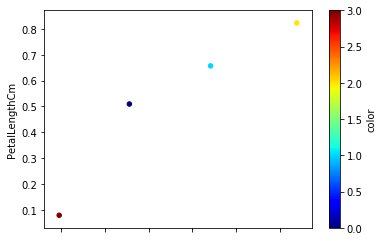

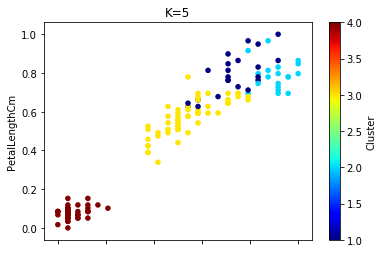

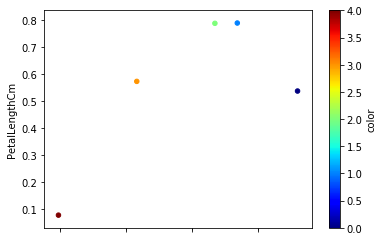

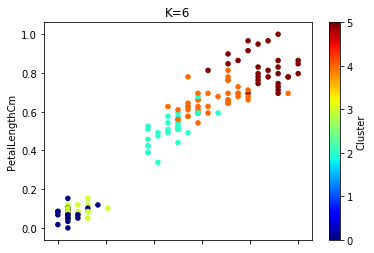

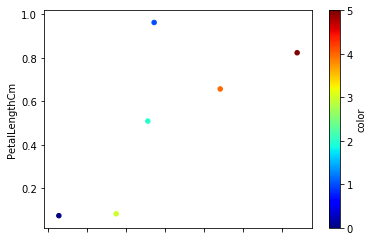

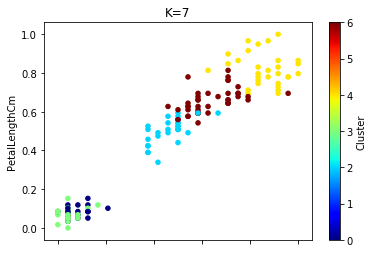

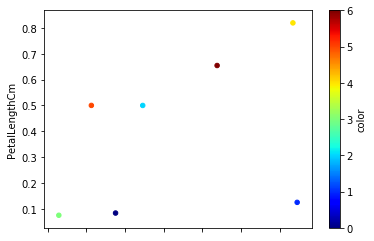

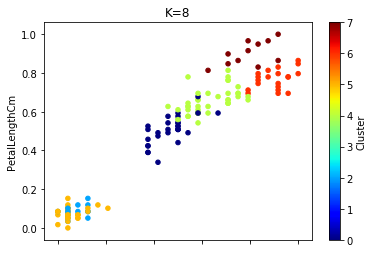

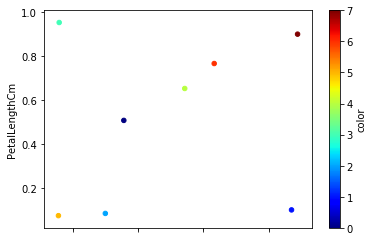

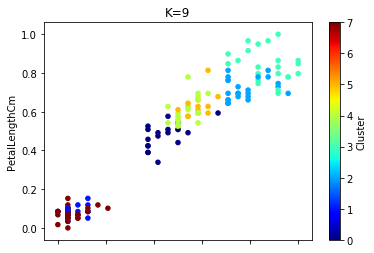

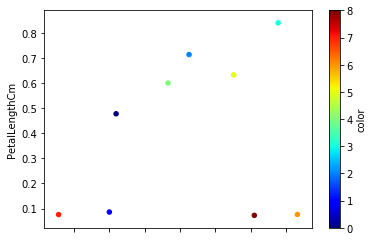

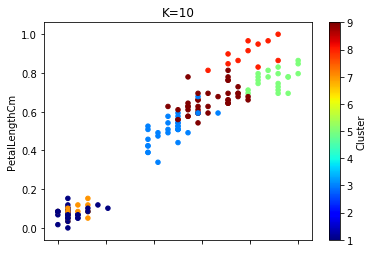

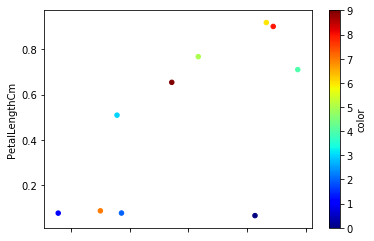

In [10]:
#Convert to numpy array
checknum=iris.values

#Loop through values k=2 to k=10
for k in range(2,11,1):
    #cluster the data
    sometup=kmean(checknum, k)
    #plot the data
    newcol=['Cluster'] + iriscol
    newdatasets = pd.DataFrame(columns=newcol,data=sometup[0])
    newdatasets.plot.scatter(x='PetalWidthCm', y='PetalLengthCm', c='Cluster',colormap='jet', title="K="+str(k))

    #Plot centroids
    cents = pd.DataFrame(columns=iriscol,data=sometup[1])
    colors=[]
    for i in range(0, k, 1):
        colors.append(i)
    cents['color']=colors
    cents.plot.scatter(x='SepalLengthCm', y='PetalLengthCm', c='color',colormap='jet')
